In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


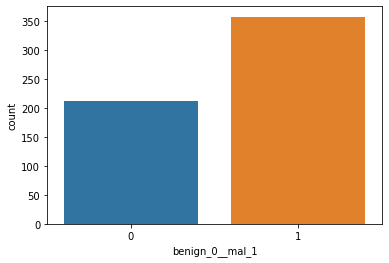

In [7]:
sns.countplot(x='benign_0__mal_1',data = df)

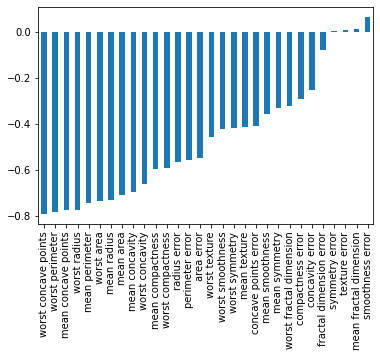

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

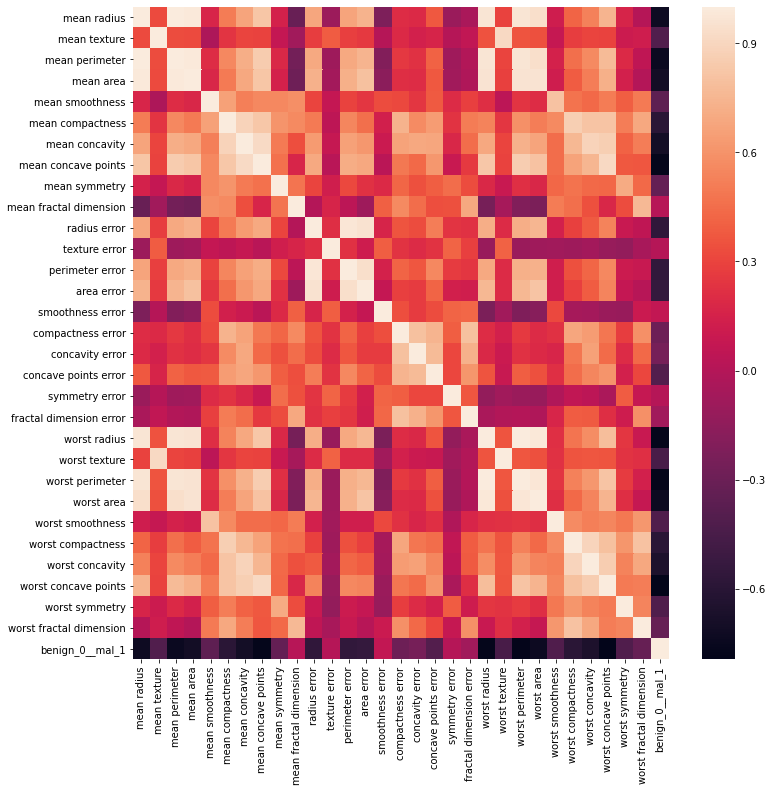

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [17]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values 

In [18]:
from sklearn.model_selection import train_test_split 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 101)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
from tensorflow.keras.models import Sequential 

In [32]:
from tensorflow.keras.layers import Dense,Dropout 

In [34]:
X_train.shape

(426, 30)

In [37]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7016 - val_loss: 0.6901
Epoch 2/600
426/426 [==============================] - 0s 95us/sample - loss: 0.6822 - val_loss: 0.6691
Epoch 3/600
426/426 [==============================] - 0s 83us/sample - loss: 0.6593 - val_loss: 0.6447
Epoch 4/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6322 - val_loss: 0.6140
Epoch 5/600
426/426 [==============================] - 0s 102us/sample - loss: 0.5996 - val_loss: 0.5711
Epoch 6/600
426/426 [==============================] - 0s 97us/sample - loss: 0.5528 - val_loss: 0.5199
Epoch 7/600
426/426 [==============================] - 0s 87us/sample - loss: 0.4997 - val_loss: 0.4668
Epoch 8/600
426/426 [==============================] - 0s 103us/sample - loss: 0.4447 - val_loss: 0.4096
Epoch 9/600
426/426 [==============================] - 0s 90us/sample - loss: 0.3924 - val_loss: 0.3593
Epoch 10/600
426/

426/426 [==============================] - 0s 84us/sample - loss: 0.0584 - val_loss: 0.1064
Epoch 79/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0545 - val_loss: 0.1178
Epoch 80/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0536 - val_loss: 0.1080
Epoch 81/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0563 - val_loss: 0.1172
Epoch 82/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0543 - val_loss: 0.1130
Epoch 83/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0530 - val_loss: 0.1134
Epoch 84/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0566 - val_loss: 0.1152
Epoch 85/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0560 - val_loss: 0.1097
Epoch 86/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0530 - val_loss: 0.1156
Epoch 87/600
426/426 [==============================] - 0s 79us/samp

426/426 [==============================] - 0s 102us/sample - loss: 0.0426 - val_loss: 0.1224
Epoch 156/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0416 - val_loss: 0.1283
Epoch 157/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0430 - val_loss: 0.1271
Epoch 158/600
426/426 [==============================] - 0s 81us/sample - loss: 0.0425 - val_loss: 0.1219
Epoch 159/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0489 - val_loss: 0.1240
Epoch 160/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0408 - val_loss: 0.1323
Epoch 161/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0416 - val_loss: 0.1264
Epoch 162/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0402 - val_loss: 0.1333
Epoch 163/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0427 - val_loss: 0.1270
Epoch 164/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 76us/sample - loss: 0.0330 - val_loss: 0.1349
Epoch 233/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0331 - val_loss: 0.1365
Epoch 234/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0336 - val_loss: 0.1385
Epoch 235/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0332 - val_loss: 0.1515
Epoch 236/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0334 - val_loss: 0.1352
Epoch 237/600
426/426 [==============================] - 0s 81us/sample - loss: 0.0350 - val_loss: 0.1472
Epoch 238/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0330 - val_loss: 0.1440
Epoch 239/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0324 - val_loss: 0.1431
Epoch 240/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0342 - val_loss: 0.1479
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 89us/sample - loss: 0.0255 - val_loss: 0.1667
Epoch 310/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0247 - val_loss: 0.1505
Epoch 311/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0260 - val_loss: 0.1609
Epoch 312/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0360 - val_loss: 0.1719
Epoch 313/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0266 - val_loss: 0.1550
Epoch 314/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0258 - val_loss: 0.1661
Epoch 315/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0243 - val_loss: 0.1532
Epoch 316/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0259 - val_loss: 0.1583
Epoch 317/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0257 - val_loss: 0.1567
Epoch 318/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 70us/sample - loss: 0.0193 - val_loss: 0.1832
Epoch 387/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0210 - val_loss: 0.1815
Epoch 388/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0280 - val_loss: 0.1960
Epoch 389/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0223 - val_loss: 0.1756
Epoch 390/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0187 - val_loss: 0.1739
Epoch 391/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0186 - val_loss: 0.1786
Epoch 392/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0221 - val_loss: 0.1742
Epoch 393/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0221 - val_loss: 0.1822
Epoch 394/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0211 - val_loss: 0.1666
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 75us/sample - loss: 0.0199 - val_loss: 0.2409
Epoch 464/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0157 - val_loss: 0.1918
Epoch 465/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0158 - val_loss: 0.2071
Epoch 466/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0137 - val_loss: 0.1972
Epoch 467/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0145 - val_loss: 0.2169
Epoch 468/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0150 - val_loss: 0.2154
Epoch 469/600
426/426 [==============================] - 0s 102us/sample - loss: 0.0130 - val_loss: 0.1998
Epoch 470/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0126 - val_loss: 0.2222
Epoch 471/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0131 - val_loss: 0.2148
Epoch 472/600
426/426 [==============================] -

426/426 [==============================] - 0s 82us/sample - loss: 0.0156 - val_loss: 0.2645
Epoch 541/600
426/426 [==============================] - 0s 81us/sample - loss: 0.0149 - val_loss: 0.2086
Epoch 542/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0141 - val_loss: 0.2422
Epoch 543/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0170 - val_loss: 0.2281
Epoch 544/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0116 - val_loss: 0.2314
Epoch 545/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0093 - val_loss: 0.2293
Epoch 546/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0075 - val_loss: 0.2306
Epoch 547/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0078 - val_loss: 0.2350
Epoch 548/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0075 - val_loss: 0.2345
Epoch 549/600
426/426 [==============================] - 0s 

In [39]:
losses = pd.DataFrame(model.history.history)

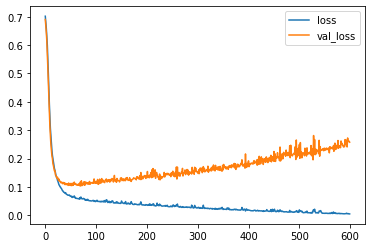

In [40]:
losses.plot()

In [45]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [78]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

In [49]:
model_loss = pd.DataFrame(model.history.history)

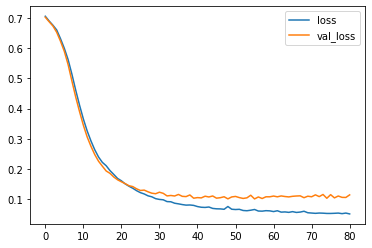

In [50]:
model_loss.plot()

In [ ]:
from tensorlow.keras.layer import Dropout

In [69]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [79]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

In [71]:
model_loss = pd.DataFrame(model.history.history)

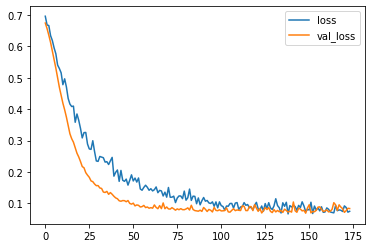

In [72]:
model_loss.plot()

In [73]:
predictions = model.predict_classes(X_test)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix 

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [76]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
